In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [37]:
data = pd.read_csv('../Data/SPY.csv', usecols = ['Date', 'Open', 'Adj Close'], parse_dates = ['Date'], index_col = 'Date')
data = data.reindex(index=data.index[::-1])
print data.head(n=5)

               Open  Adj Close
Date                          
1993-01-29  43.9687  28.000838
1993-02-01  43.9687  28.199990
1993-02-02  44.2187  28.259704
1993-02-03  44.4062  28.558465
1993-02-04  44.9687  28.677956


In [38]:
start = '2016-01-01'
end = '2017-01-01'
dates = pd.date_range(start, end)
new_data = pd.DataFrame(index = dates)
new_data = new_data.join(data, how = 'inner')
print new_data.shape

(252, 2)


In [39]:
moving_average_20_days = new_data['Adj Close'].rolling(window = 20, min_periods = 20).mean()
new_data['mov_avg'] = moving_average_20_days
print new_data.head(n=30)

                  Open   Adj Close     mov_avg
2016-01-04  200.490005  196.794026         NaN
2016-01-05  201.399994  197.126874         NaN
2016-01-06  198.339996  194.640278         NaN
2016-01-07  195.330002  189.970552         NaN
2016-01-08  195.190002  187.885326         NaN
2016-01-11  193.009995  188.071334         NaN
2016-01-12  193.820007  189.588752         NaN
2016-01-13  194.449997  184.860290         NaN
2016-01-14  189.550003  187.895110         NaN
2016-01-15  186.770004  183.861729         NaN
2016-01-19  189.960007  184.106473         NaN
2016-01-20  185.029999  181.747134         NaN
2016-01-21  186.210007  182.765279         NaN
2016-01-22  189.779999  186.514764         NaN
2016-01-25  189.919998  183.695304         NaN
2016-01-26  188.419998  186.201484         NaN
2016-01-27  189.580002  184.175008         NaN
2016-01-28  189.960007  185.134402         NaN
2016-01-29  190.020004  189.647488         NaN
2016-02-01  192.529999  189.578953  187.713028
2016-02-02  1

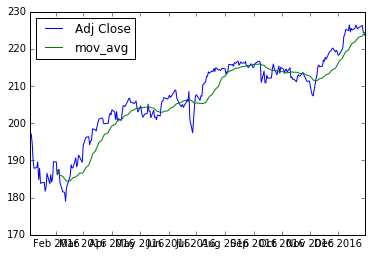

In [46]:
plt.plot(new_data['Adj Close'])
plt.plot(new_data['mov_avg'])
plt.legend(loc = 'best')
plt.show()